# Benchmark

**Introduction:**
Using the data gathered from Taarifa and the Tanzanian Ministry of Water, can we predict which pumps are functional, which need some repairs, and which don't work at all? Predicting one of these three classes based and a smart understanding of which waterpoints will fail, can improve the maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

This is also an intermediate-level competition by [DataDriven][1]! All code & support scripts are in [Github Repo][2]

[1]: https://www.drivendata.org/competitions/7/ "Link to Competetion Page"
[2]: https://github.com/msampathkumar/datadriven_pumpit "User Code"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scripts.sam_value_counts import sam_dataframe_cols_value_count_analysis, sam_dataframe_markup_value_counts
from scripts.sam_confusion_matrix import sam_plot_confusion_matrix, sam_confusion_maxtrix
from scripts.sam_variance_check import get_low_variance_columns
from scripts.tools import check_metric, data_transformations, df_check_stats, game

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA

np.set_printoptions(precision=5)
np.random.seed(69572)
plt.style.use('ggplot')
sns.set(color_codes=True)

%matplotlib inline

In [4]:
# benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
clf = game(X_train, X_test, y_train, y_test, algo='rf', )

------------------------------------------------
AC Score: 0.984893378227 F1 Score: 0.984967486314
------------------------------------------------
AC Score: 0.800269360269 F1 Score: 0.807050785296


In [59]:
# benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
clf = game(X_train, X_test, y_train, y_test, algo='rf', )

------------------------------------------------
AC Score: 0.984848484848 F1 Score: 0.984906895824
------------------------------------------------
AC Score: 0.799865319865 F1 Score: 0.806462319165


In [5]:
sam_pickle_save(X, y, TEST_X, prefix="tmp/Iteration0_")
df_check_stats(X, y, TEST_X)

SAVE PREFIX USED:  tmp/Iteration0_
Data Frame Shape: (59400, 43) TotColumns: 43 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 43) TotColumns: 43 ObjectCols: 0


In [6]:
# benchmark
gbt_clf = game(X_train, X_test, y_train, y_test, algo='gb')

------------------------------------------------
AC Score: 0.758249158249 F1 Score: 0.779364337278
------------------------------------------------
AC Score: 0.756565656566 F1 Score: 0.778507572352


In [7]:
knn_clf = game(X_train, X_test, y_train, y_test, algo='knn')

------------------------------------------------
AC Score: 0.727227833895 F1 Score: 0.736122325812
------------------------------------------------
AC Score: 0.603703703704 F1 Score: 0.616028952754


In [8]:
df_check_stats(X, y, TEST_X)

Data Frame Shape: (59400, 43) TotColumns: 43 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 43) TotColumns: 43 ObjectCols: 0


In [9]:
X, y, TEST_X = sam_pickle_load(prefix="tmp/Iteration0_")
df_check_stats(X, y, TEST_X)

LOAD PREFIX USED:  tmp/Iteration0_
Data Frame Shape: (59400, 43) TotColumns: 43 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 43) TotColumns: 43 ObjectCols: 0


In [10]:
# Variance Threshold
X, removed_features, ranking_variance_thresholds = get_low_variance_columns(dframe=X, threshold=(0.85 * (1 - 0.85)), autoremove=True)
TEST_X.drop(removed_features, axis=1, inplace=True)

# Benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
clf = game(X_train, X_test, y_train, y_test, algo='rf', show_train_scores=False)

Finding low-variance features.
Found 2 low-variance columns.
                
Removing low-variance features.
Reassembling the dataframe (with low-variance features removed).
Succesfully removed low-variance columns.
------------------------------------------------
AC Score: 0.800067340067 F1 Score: 0.806963721079


In [11]:
print(removed_features)

['public_meeting', 'recorded_by']


In [12]:
def sam_pickle_save(df_x, df_y, df_test_x, prefix="tmp/Iteration1_"):
    print('SAVE PREFIX USED: ', prefix)
    pickle.dump(df_x, open(prefix + 'df_x.pkl', 'wb'))
    pickle.dump(df_y, open(prefix + 'df_y.pkl', 'wb'))
    pickle.dump(df_test_x, open(prefix + 'df_test_x.pkl', 'wb'))
    return

def sam_pickle_load(prefix='tmp/Iteration1_'):
    print('LOAD PREFIX USED: ', prefix)
    df_x = pickle.load(open(prefix + 'df_x.pkl', 'rb'))
    df_y = pickle.load(open(prefix + 'df_y.pkl', 'rb'))
    df_test_x = pickle.load(open(prefix + 'df_test_x.pkl', 'rb'))
    return df_x, df_y, df_test_x

In [13]:
sam_pickle_save(X, y, TEST_X, prefix="tmp/Iteration1_vt_")

SAVE PREFIX USED:  tmp/Iteration1_vt_


In [14]:
X, y, TEST_X = sam_pickle_load(prefix='tmp/Iteration1_vt_')

len(X.columns)

LOAD PREFIX USED:  tmp/Iteration1_vt_


41

In [19]:
# KBest Selection
def find_kbest_cols_count(start=10, stop=37, step=3):
    for kbest_cols in range(start, stop, step):
        print('============================================================', kbest_cols)

        # Load Data
        X, y, TEST_X = sam_pickle_load(prefix='tmp/Iteration1_vt_')

        fit = SelectKBest(score_func=chi2, k=kbest_cols).fit(X, y)
        cols_names = X.columns
        kbest_selected_cols =  [_ for _ in cols_names[:kbest_cols]]

        # transformation
        X = pd.DataFrame(fit.transform(X))
        TEST_X = pd.DataFrame(fit.transform(TEST_X))

        # check
        # df_check_stats(X, y)

        # benchmark
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
        clf = game(X_train, X_test, y_train, y_test, algo='rf', show_train_scores=False)
    return fit, kbest_selected_cols

In [21]:
fit, cols =  find_kbest_cols_count(start=10, stop=len(X.columns), step=3)

============================================================ 10
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.71771043771 F1 Score: 0.723951739882
============================================================ 13
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.727138047138 F1 Score: 0.734099387049
============================================================ 16
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.758922558923 F1 Score: 0.765612373538
============================================================ 19
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.755151515152 F1 Score: 0.761918045089
============================================================ 22
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.75898989899 F1 Score: 0.7661808453

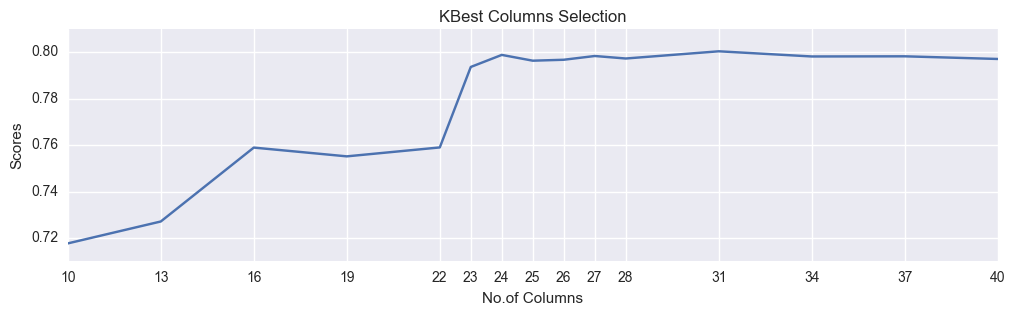

In [24]:
data = '''
============================================================ 10
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.71771043771 F1 Score: 0.723951739882
============================================================ 13
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.727138047138 F1 Score: 0.734099387049
============================================================ 16
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.758922558923 F1 Score: 0.765612373538
============================================================ 19
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.755151515152 F1 Score: 0.761918045089
============================================================ 22
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.75898989899 F1 Score: 0.76618084531
============================================================ 23
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.793602693603 F1 Score: 0.800408397206
============================================================ 24
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.798787878788 F1 Score: 0.805653347673
============================================================ 25
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.796296296296 F1 Score: 0.802938757174
============================================================ 26
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.7967003367 F1 Score: 0.803590422061
============================================================ 27
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.798316498316 F1 Score: 0.804857599344
============================================================ 28
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.797239057239 F1 Score: 0.803260880721
============================================================ 31
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.800336700337 F1 Score: 0.806794962674
============================================================ 34
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.798114478114 F1 Score: 0.804644856414
============================================================ 37
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.798181818182 F1 Score: 0.80500555388
============================================================ 40
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.797037037037 F1 Score: 0.803555396421
'''

data_k_selections = []
data_k_ac_scores = []
data_k_f1_scores = []

for line in data.strip().splitlines():
    if line.startswith('===='):
        data_k_selections.append(int(line.split()[-1]))
    if line.startswith('AC Score'):
        line = line.split()
        data_k_ac_scores.append(float(line[2]))
        data_k_f1_scores.append(float(line[-1]))

# print(data_k_selections)
# print(data_k_ac_scores)
# print(data_k_f1_scores)

plt.figure(figsize=(12, 3))
plt.plot(data_k_selections, data_k_ac_scores)
plt.xticks(data_k_selections)
plt.xlabel('No.of Columns')
plt.ylabel('Scores')
plt.title('KBest Columns Selection')

In [ ]:
data = '''
============================================================ 10
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.711919191919 F1 Score: 0.720536764767
============================================================ 13
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.726734006734 F1 Score: 0.734890085175
============================================================ 16
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.757171717172 F1 Score: 0.764712247986
============================================================ 19
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.761279461279 F1 Score: 0.769056776288
============================================================ 22
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.76303030303 F1 Score: 0.769985851326
============================================================ 25
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.799797979798 F1 Score: 0.806818418096
============================================================ 28
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.799797979798 F1 Score: 0.806270223927
============================================================ 31
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.795016835017 F1 Score: 0.802364133642
============================================================ 34
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.796767676768 F1 Score: 0.803839413982
'''

data_k_selections = []
data_k_ac_scores = []
data_k_f1_scores = []

for line in data.strip().splitlines():
    if line.startswith('===='):
        data_k_selections.append(int(line.split()[-1]))
    if line.startswith('AC Score'):
        line = line.split()
        data_k_ac_scores.append(float(line[2]))
        data_k_f1_scores.append(float(line[-1]))

# print(data_k_selections)
# print(data_k_ac_scores)
# print(data_k_f1_scores)

plt.figure(figsize=(12, 3))
plt.plot(data_k_selections, data_k_ac_scores)
plt.xticks(data_k_selections)
plt.xlabel('No.of Columns')
plt.ylabel('Scores')
plt.title('KBest Columns Selection')

In [23]:
# KBest Selection
find_kbest_cols_count(start=23, stop=28, step=1)

============================================================ 23
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.793602693603 F1 Score: 0.800408397206
============================================================ 24
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.798787878788 F1 Score: 0.805653347673
============================================================ 25
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.796296296296 F1 Score: 0.802938757174
============================================================ 26
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.7967003367 F1 Score: 0.803590422061
============================================================ 27
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.798316498316 F1 Score: 0.8048575993

(SelectKBest(k=27, score_func=<function chi2 at 0x10def2488>),
 ['amount_tsh',
  'date_recorded',
  'funder',
  'gps_height',
  'installer',
  'longitude',
  'latitude',
  'wpt_name',
  'num_private',
  'basin',
  'subvillage',
  'region',
  'region_code',
  'district_code',
  'lga',
  'ward',
  'population',
  'scheme_management',
  'scheme_name',
  'permit',
  'construction_year',
  'extraction_type',
  'extraction_type_group',
  'extraction_type_class',
  'management',
  'management_group',
  'payment'])

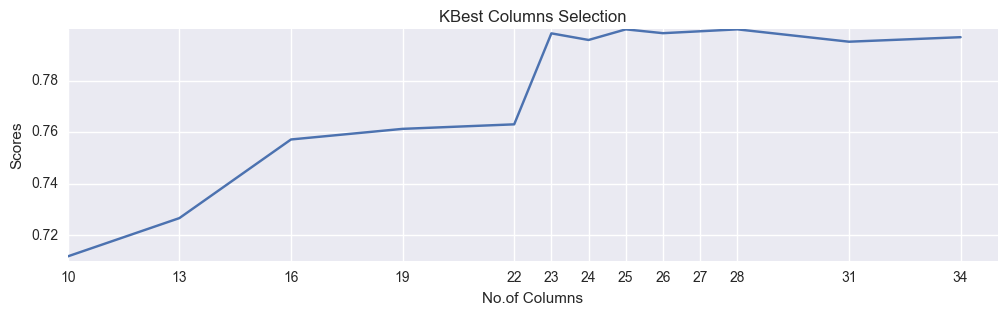

In [112]:
data = '''
============================================================ 10
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.711919191919 F1 Score: 0.720536764767
============================================================ 13
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.726734006734 F1 Score: 0.734890085175
============================================================ 16
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.757171717172 F1 Score: 0.764712247986
============================================================ 19
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.761279461279 F1 Score: 0.769056776288
============================================================ 22
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.76303030303 F1 Score: 0.769985851326
============================================================ 23
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.798249158249 F1 Score: 0.80539129644
============================================================ 24
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.79569023569 F1 Score: 0.802599368819
============================================================ 25
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.799797979798 F1 Score: 0.806818418096
============================================================ 26
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.798316498316 F1 Score: 0.804709836423
============================================================ 27
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.799057239057 F1 Score: 0.805970155845
============================================================ 28
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.799797979798 F1 Score: 0.806270223927
============================================================ 31
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.795016835017 F1 Score: 0.802364133642
============================================================ 34
LOAD PREFIX USED:  tmp/Iteration1_vt_
------------------------------------------------
AC Score: 0.796767676768 F1 Score: 0.803839413982
'''

data_k_selections = []
data_k_ac_scores = []
data_k_f1_scores = []

for line in data.strip().splitlines():
    if line.startswith('===='):
        data_k_selections.append(int(line.split()[-1]))
    if line.startswith('AC Score'):
        line = line.split()
        data_k_ac_scores.append(float(line[2]))
        data_k_f1_scores.append(float(line[-1]))

# print(data_k_selections)
# print(data_k_ac_scores)
# print(data_k_f1_scores)

plt.figure(figsize=(12, 3))
plt.plot(data_k_selections, data_k_ac_scores)
plt.xticks(data_k_selections)
plt.xlabel('No.of Columns')
plt.ylabel('Scores')
plt.title('KBest Columns Selection')

In [124]:
# KBEST SELECTION

kbest_cols = 25
print('============================================================', kbest_cols)

# Load Data
X, y, TEST_X = sam_pickle_load(prefix='tmp/Iteration1_vt_')

fit = SelectKBest(score_func=chi2, k=kbest_cols).fit(X, y)
cols_names = X.columns
kbest_selected_cols =  [_ for _ in cols_names[:kbest_cols]]

# transformation
X = pd.DataFrame(fit.transform(X))
TEST_X = pd.DataFrame(fit.transform(TEST_X))

# check
df_check_stats(X, y)

# benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
clf = game(X_train, X_test, y_train, y_test, algo='rf', show_train_scores=False)

============================================================ 25
LOAD PREFIX USED:  tmp/Iteration1_vt_
Data Frame Shape: (59400, 25) TotColumns: 25 ObjectCols: 0
Numpy Array Size: 59400
------------------------------------------------
AC Score: 0.799797979798 F1 Score: 0.806818418096


In [125]:
sam_pickle_save(X, y, TEST_X, prefix='tmp/Iteration1_vt_kb_')

SAVE PREFIX USED:  tmp/Iteration1_vt_kb_


In [130]:
X, y, TEST_X = sam_pickle_load(prefix='tmp/Iteration1_vt_kb_')
df_check_stats(X, y, TEST_X)

LOAD PREFIX USED:  tmp/Iteration1_vt_kb_
Data Frame Shape: (59400, 25) TotColumns: 25 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 25) TotColumns: 25 ObjectCols: 0


In [126]:
# PCA
from sklearn.decomposition import PCA

In [132]:
pca = PCA()
fit = pca.fit(X)

X = fit.transform(X)

# benchmark
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
clf = game(X_train, X_test, y_train, y_test, algo='rf', show_train_scores=False)

------------------------------------------------
AC Score: 0.779393939394 F1 Score: 0.787564863498


In [144]:
X[:, :10].shape

(59400, 10)